In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid

In [3]:
sid =sid()

In [6]:
data=pd.read_csv(r'C:\Users\Hi\Finlang\data\api\processed_data.csv')

In [7]:
data.head(2)

,id,index,category,datetime,headline,image,source,summary,url,date
0,7475478,0,top news,2025-04-25 00:01:00,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...,2025-04-25
1,7475476,1,top news,2025-04-24 23:50:49,Alphabet expects 'slight headwind' to ads busi...,https://image.cnbcfm.com/api/v1/image/10813640...,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...,2025-04-24


In [15]:
data.set_index('id',inplace=True)

In [16]:
data['sentiment_score']=data['headline'].apply(lambda x: sid.polarity_scores (str(x))['compound'])

In [17]:
data.head(2)

,index,category,datetime,headline,image,source,summary,url,date,sentiment_score
id,,,,,,,,,,
7475478,0,top news,2025-04-25 00:01:00,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...,2025-04-25,0.5927
7475476,1,top news,2025-04-24 23:50:49,Alphabet expects 'slight headwind' to ads busi...,https://image.cnbcfm.com/api/v1/image/10813640...,CNBC,The comments come as Alphabet and other tech c...,https://www.cnbc.com/2025/04/24/alphabet-expec...,2025-04-24,0.0000


In [18]:
def sa_scores(score):
    if score >0:
        return 'Positive'
    elif score <0 :
        return 'Negative'
    else :
        return 'Neutral'
data['sentiment_label']=data['sentiment_score'].apply(sa_scores)


In [24]:
data.to_csv(r'C:\Users\Hi\Finlang\data\api\processed_data.csv')

In [25]:
data.loc[data['sentiment_label']=='Neutral' ,'headline'].head(2)

id
7475476    Alphabet expects 'slight headwind' to ads busi...
7475438    Skechers says it can’t predict trade-war impac...
Name: headline, dtype: object

In [26]:
data.loc[data['sentiment_score'] >0].head(2)

,index,category,datetime,headline,image,source,summary,url,date,sentiment_score,sentiment_label
id,,,,,,,,,,,
7475478,0,top news,2025-04-25 00:01:00,Alphabet’s blowout earnings may mark the peak ...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Google’s cloud business has big opportunity ah...,https://www.marketwatch.com/story/alphabets-bl...,2025-04-25,0.5927,Positive
7475477,2,top news,2025-04-24 23:02:52,Jim Cramer credits this week's rally to earnin...,https://image.cnbcfm.com/api/v1/image/10707631...,CNBC,CNBC's Jim Cramer analyzed recent market action.,https://www.cnbc.com/2025/04/24/jim-cramer-att...,2025-04-24,0.3612,Positive


In [27]:
data.loc[data['sentiment_score']<0].head(2)

,index,category,datetime,headline,image,source,summary,url,date,sentiment_score,sentiment_label
id,,,,,,,,,,,
7475462,3,top news,2025-04-24 22:50:00,S&P 500’s rapid exit from correction territory...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,The stock market just recouped a stunning $4.2...,https://www.marketwatch.com/story/s-p-500s-rap...,2025-04-24,-0.3818,Negative
7475437,4,top news,2025-04-24 21:32:00,Democrats ask if the $1 billion in DOGE cost-c...,https://static2.finnhub.io/file/publicdatany/f...,MarketWatch,Senators ask for the impact of staffing cuts a...,https://www.marketwatch.com/story/democrats-as...,2025-04-24,-0.2500,Negative


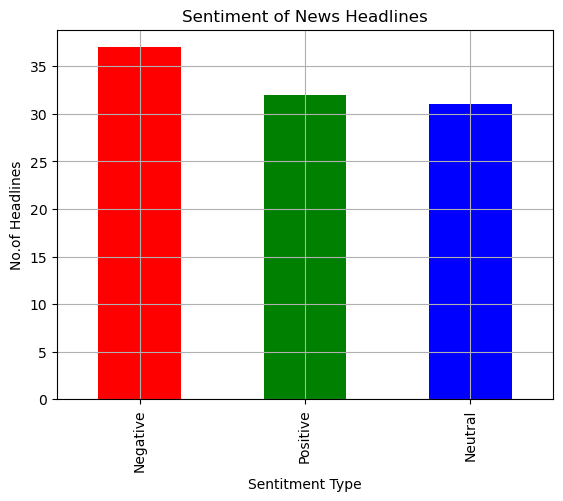

In [28]:
data['sentiment_label'].value_counts().plot(kind="bar",color=['red','green','blue'])
plt.xlabel('Sentitment Type')
plt.ylabel('No.of Headlines')
plt.title('Sentiment of News Headlines')
plt.grid(True)
plt.show()